In [9]:
import pandas as pd
import re
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import string
import sklearn.metrics
import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as sts
import math
from sklearn.model_selection import ShuffleSplit
import plotly.express as px
import statistics
#from standardize_format import standardized_maxquant_msms, standardized_CDAP_psm, standardized_Michi_psm, standardized_PNNL_report
#from standardize_format import convert_to_psmtxt

In [15]:
#Kuster Results
#AutoRT
test=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_test/test.csv')
LL2=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_LL2/test.csv')
sim1=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_sim1/test.csv')
sim2=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_sim2/test.csv')
LL4=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_LL4/test.csv')

In [16]:
HH1_index=[]
H1_index=[]
for i in range(len(test)):
    if ('1' in list(test.x.iloc[i])) | ('2' in list(test.x.iloc[i])) | ('3' in list(test.x.iloc[i])) | ('4' in list(test.x.iloc[i])):
        HH1_index.append(i)
    if ('1' not in list(test.x.iloc[i])) & ('2' not in list(test.x.iloc[i])) & ('3' not in list(test.x.iloc[i])) & ('4' not in list(test.x.iloc[i])):
        H1_index.append(i)
HH1=test.iloc[HH1_index]
H1=test.iloc[H1_index]

In [17]:
HH1['peptide']=pd.Series(np.repeat('modified',len(HH1))).values
H1['peptide']=pd.Series(np.repeat('unmodified',len(H1))).values
HH1_H1=pd.concat([HH1,H1],axis=0)

<ipython-input-17-3fb2af6158d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HH1['peptide']=pd.Series(np.repeat('modified',len(HH1))).values
<ipython-input-17-3fb2af6158d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1['peptide']=pd.Series(np.repeat('unmodified',len(H1))).values


<ipython-input-18-6bd7b74c49ec>:19: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3b_scatter.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


<Figure size 720x720 with 0 Axes>

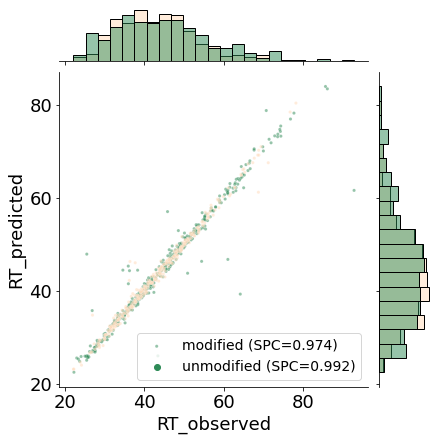

In [18]:
#Figure 3b
plt.figure(1, figsize=(10,10))
g = sns.JointGrid(data=HH1_H1,x='y', y='y_pred',hue='peptide',space=0.2,palette={'modified':'seagreen','unmodified':'peachpuff'})
g.set_axis_labels('RT_observed','RT_predicted',size=18)
g.ax_joint.set_yticks([0,20,40,60,80,100])
g.ax_joint.set_xticks([0,20,40,60,80,100])
for tick in g.ax_joint.get_xticklabels():         
    tick.set_size(18)
for tick in g.ax_joint.get_yticklabels():         
    tick.set_size(18)
HH1_cor=round(sts.spearmanr(HH1.y, HH1.y_pred)[0],3)
H1_cor=round(sts.spearmanr(H1.y, H1.y_pred)[0],3)
labels=[''.join(['modified (SPC=',str(HH1_cor),')']),''.join(['unmodified (SPC=',str(H1_cor),')'])]
g.plot_joint(sns.scatterplot, s=10, alpha=.5)
g.plot_marginals(sns.histplot,alpha=0.5)
g.ax_joint.legend()
legend_properties = {'size':14}
legendMain=g.ax_joint.legend(labels=labels,prop=legend_properties)
plt.savefig('../plot/Figure3b_scatter.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [19]:
rt_HH1=abs(HH1.y-HH1.y_pred)
rt_LL2=abs(LL2.y-LL2.y_pred)
rt_sim1=abs(sim1.y-sim1.y_pred)
rt_sim2=abs(sim2.y-sim2.y_pred)
rt_LL4=abs(LL4.y-LL4.y_pred)

In [20]:
H2=pd.read_table('../data/AutoRT_results/Kuster/Kuster_byseq/tf_prediction_Nano_Kuster_byseq_1-10_cross1_H2/test.csv')

In [21]:
rt_H1=abs(H1.y-H1.y_pred)
rt_H2=abs(H2.y-H2.y_pred)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M_SeqT_LocT v.s. M_SeqT_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.479e-95 U_stat=3.091e+04
M_SeqT_LocT v.s. M_sim1_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.617e-109 U_stat=2.902e+05
M_SeqT_LocT v.s. M_sim2_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.659e-105 U_stat=2.115e+05
M_SeqT_LocT v.s. M_SeqF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.932e-206 U_stat=1.879e+05


<ipython-input-22-6d65e7336437>:22: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/figure3c_mod_deltaRT.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


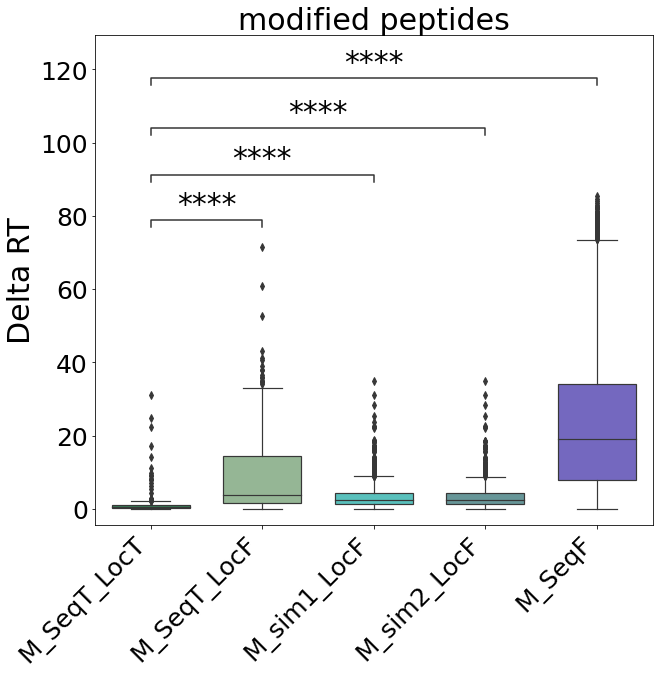

In [22]:
plt.figure(1, figsize=(10,9))
x = np.array(['M_SeqT_LocT','M_SeqT_LocF','M_sim1_LocF','M_sim2_LocF','M_SeqF'])
Group = np.repeat(x, [len(rt_HH1),len(rt_LL2),len(rt_sim1),len(rt_sim2),len(rt_LL4)], axis=0)
d = {'col1': np.array(pd.concat([rt_HH1,rt_LL2,rt_sim1,rt_sim2,rt_LL4])), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"M_SeqT_LocT": "seagreen", "M_SeqT_LocF": "darkseagreen", 
          "M_sim1_LocF":"mediumturquoise","M_sim2_LocF":"cadetblue","M_SeqF":"slateblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.title('modified peptides',size=30)
plt.ylabel('Delta RT',size=30)
plt.xlabel('')
plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("M_SeqT_LocT","M_SeqT_LocF"),
                                             ("M_SeqT_LocT","M_sim1_LocF"),
                                              ("M_SeqT_LocT","M_sim2_LocF"),
                                              ("M_SeqT_LocT","M_SeqF")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/figure3c_mod_deltaRT.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

UM_SeqT v.s. UM_SeqF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.254e-133 U_stat=1.632e+04


<ipython-input-23-bdf809ef328e>:21: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3d_unmod_deltaRT_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


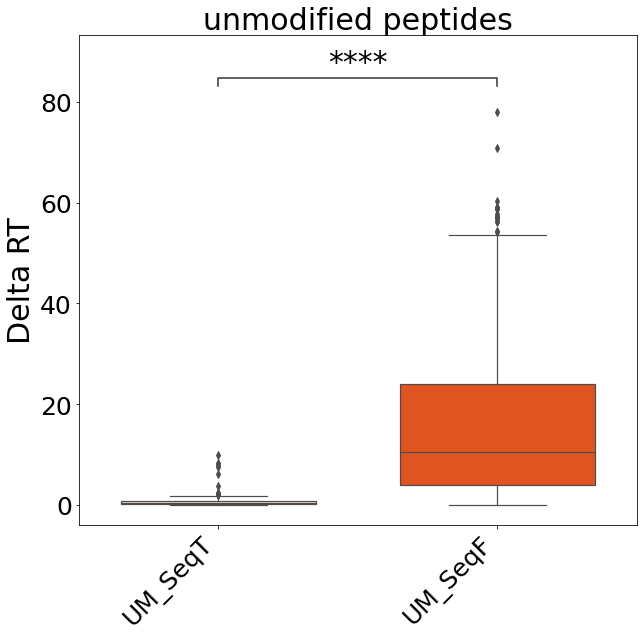

In [23]:
plt.figure(1, figsize=(10,9))
x = np.array(['UM_SeqT','UM_SeqF'])
Group = np.repeat(x, [len(rt_H1),len(rt_H2)], axis=0)
d = {'col1': np.array(pd.concat([rt_H1,rt_H2])), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"UM_SeqT": "peachpuff", 
          "UM_SeqF": "orangered"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.title('unmodified peptides',size=30)
plt.ylabel('Delta RT',size=30)
plt.xlabel('')

plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)

test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("UM_SeqT","UM_SeqF")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/Figure3d_unmod_deltaRT_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [35]:
#AUROC
from sklearn.metrics import auc,roc_curve
from scipy import interp
from itertools import cycle
n_classes=5
group=['UM_SeqF',
       'M_SeqT_LocF','M_sim1_LocF','M_sim2_LocF','M_SeqF']
# group=['Negative 1','Negative 2','Negative 3',
#        'Negative 4','Negative 5','Negaitve 6']
pred_pos=[rt_H1.tolist(),
          rt_HH1.tolist(),rt_HH1.tolist(),rt_HH1.tolist(),rt_HH1.tolist()]
pred_neg=[rt_H2.tolist(),
          rt_LL2.tolist(),rt_sim1.tolist(),rt_sim2.tolist(),rt_LL4.tolist()]
yscore=[rt_H1.tolist()+rt_H2.tolist(),
        rt_HH1.tolist()+rt_LL2.tolist(),
        rt_HH1.tolist()+rt_sim1.tolist(),
        rt_HH1.tolist()+rt_sim2.tolist(),
        rt_HH1.tolist()+rt_LL4.tolist()]
ytrue=[np.repeat([1,0],[len(rt_H1),len(rt_H2)]),
       np.repeat([1,0],[len(rt_HH1),len(rt_LL2)]),
       np.repeat([1,0],[len(rt_HH1),len(rt_sim1)]),
       np.repeat([1,0],[len(rt_HH1),len(rt_sim2)]),
       np.repeat([1,0],[len(rt_HH1),len(rt_LL4)])]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    TPR=[]
    FPR=[]
    for j in range(10000):
        pos=0
        neg=0
        n=j/100.
        for k in range(0,len(pred_pos[i])):
                if(pred_pos[i][k]<=n):
                    pos+=1
        for k in range(0,len(pred_neg[i])):
                if(pred_neg[i][k]<=n):
                    neg+=1
        TPR.append(pos/len(pred_pos[i]))
        FPR.append(neg/len(pred_neg[i]))
    tpr[i]=TPR
    fpr[i]=FPR
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-35-9a6c81154142>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<ipython-input-36-56a3eb960b39>:23: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3e_DeltaRT-roc.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


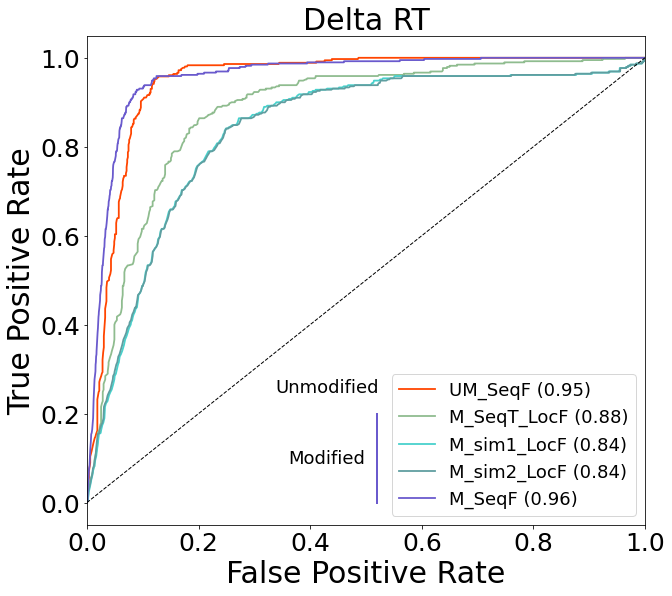

In [36]:
#Figure 3e
# Plot all ROC curves
plt.figure(1, figsize=(10,9))
colors = ['orangered', 'darkseagreen',
          'mediumturquoise','cadetblue','slateblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.8,
             label=group[i] +' ({1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=30)
plt.ylabel('True Positive Rate',size=30)
plt.title('Delta RT',size=30)
plt.yticks(size=25)
plt.xticks(size=25)
#plt.plot([0.52, 0.52], [0.25, 0.39], 'k-', lw=2,color='indianred')
plt.text(0.43, 0.26, 'Unmodified', horizontalalignment='center',verticalalignment='center',size=18)
plt.plot([0.52, 0.52], [0.0, 0.2], 'k-', lw=2,color='slateblue')
plt.text(0.43, 0.1, 'Modified', horizontalalignment='center',verticalalignment='center',size=18)
plt.legend(loc="lower right",fontsize=18)
plt.savefig('../plot/Figure3e_DeltaRT-roc.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()

In [24]:
#Kuster
#pDeep2
#pcc
HH1=pd.read_table("../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_mod/HH1-mod-pcc_6ions.txt",header=0)
LL2=pd.read_table("../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_mod/LL2-mod-pcc_6ions.txt",header=0)
sim1=pd.read_table("../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_mod/sim1-mod-pcc_6ions.txt",header=0)
sim2=pd.read_table("../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_mod/sim2-mod-pcc_6ions.txt",header=0)
LL4=pd.read_table("../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_mod/LL4-mod-pcc_6ions.txt",header=0)
H1=pd.read_table('../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_unmod/H1-unmod-pcc_6ions.txt',header=0)
H2=pd.read_table('../data/pDeep2_results/split_H1_HH1_8_6_2021/8_6_2021_pretrain_unmod/H2-unmod-pcc_6ions.txt',header=0)

<ipython-input-28-a9fbb5ea1867>:29: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3a.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


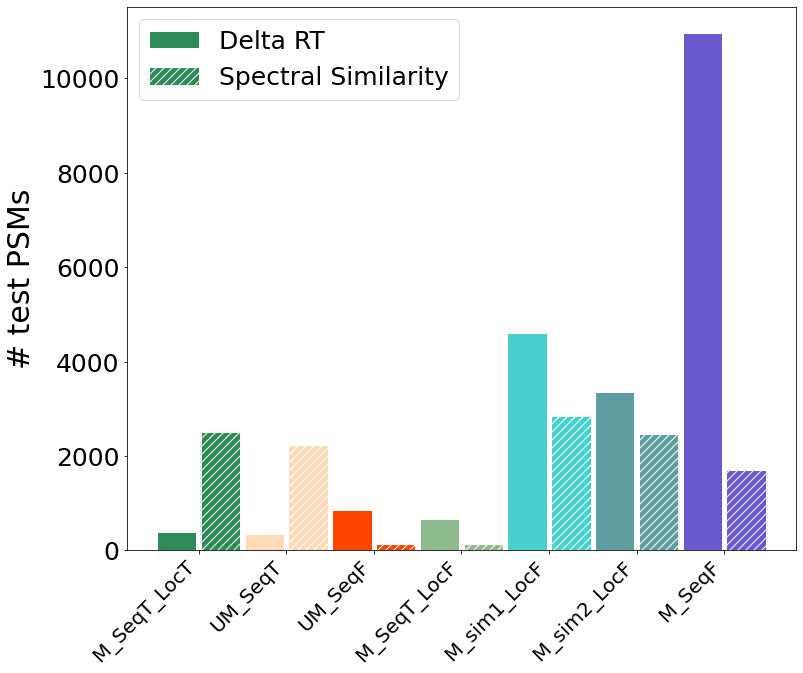

In [28]:
#Figure 3a
bars2 = [len(HH1['spc']),len(H1['spc']),len(H2['spc']),len(LL2['spc']),len(sim1['spc']),len(sim2['spc']),len(LL4['spc'])]
bars1 = [len(rt_HH1),len(rt_H1),len(rt_H2),len(rt_LL2),len(rt_sim1),len(rt_sim2),len(rt_LL4)]
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
# The position of the bars on the x-axis
r1 = [1,3,5,7,9,11,13]
r2 = [2,4,6,8,10,12,14]
r = [1.5,3.5,5.5,7.5,9.5,11.5,13.5]

plt.figure(1, figsize=(12,10))

# Names of group and bar width
group=['M_SeqT_LocT','UM_SeqT','UM_SeqF',
       'M_SeqT_LocF','M_sim1_LocF','M_sim2_LocF','M_SeqF']
#group=['HH1','H1','M1','L1','H2','M2','L2','LL2','sim1','sim2','LL3','sim3','LL4']
barWidth = 0.9

colors = ['seagreen','peachpuff','orangered', 
          'darkseagreen','mediumturquoise','cadetblue','slateblue']

# Create brown bars
plt.bar(r1, bars1, color=colors, edgecolor='white', width=barWidth)
plt.bar(r2, bars2, color=colors, edgecolor='white', width=barWidth,hatch='///')
plt.xticks(r, group,size=20,rotation=45,ha='right')
plt.yticks(size=25)
plt.legend(['Delta RT','Spectral Similarity'],fontsize=25)
plt.ylabel('# test PSMs',size=30)
plt.savefig('../plot/Figure3a.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M_SeqT_LocT v.s. M_SeqT_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.917e-63 U_stat=3.166e+05
M_SeqT_LocT v.s. M_sim1_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.847e+06
M_SeqT_LocT v.s. M_sim2_LocF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=5.898e+06
M_SeqT_LocT v.s. M_SeqF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.423e+06


<ipython-input-30-8fe064a30374>:25: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3f_pcc_mod_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


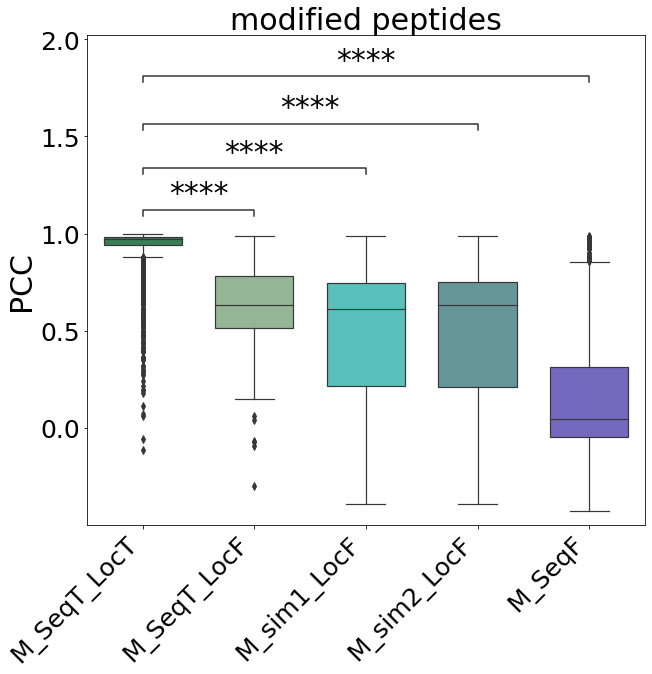

In [30]:
#Figure 3f
plt.figure(1, figsize=(10,9))
x = np.array(['M_SeqT_LocT','M_SeqT_LocF','M_sim1_LocF',
              'M_sim2_LocF','M_SeqF'])
Group = np.repeat(x, [len(HH1['pcc']),len(LL2['pcc']),len(sim1['pcc']),len(sim2['pcc']),len(LL4['pcc'])], axis=0)
d = {'col1': np.array(pd.concat([HH1['pcc'],LL2['pcc'],sim1['pcc'],sim2['pcc'],LL4['pcc']])), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"M_SeqT_LocT": "seagreen", "M_SeqT_LocF": "darkseagreen", 
          "M_sim1_LocF":"mediumturquoise","M_sim2_LocF":"cadetblue","M_SeqF":"slateblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('',weight='bold',size=12)
plt.ylabel('PCC',size=30)
plt.title('modified peptides',size=30)

plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("M_SeqT_LocT","M_SeqT_LocF"),
                                             ("M_SeqT_LocT","M_sim1_LocF"),
                                              ("M_SeqT_LocT","M_sim2_LocF"),
                                              ("M_SeqT_LocT","M_SeqF")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/Figure3f_pcc_mod_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

UM_SeqT v.s. UM_SeqF: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.875e-51 U_stat=2.604e+05


<ipython-input-29-0d8c895e376e>:20: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3g_unmod_pcc_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


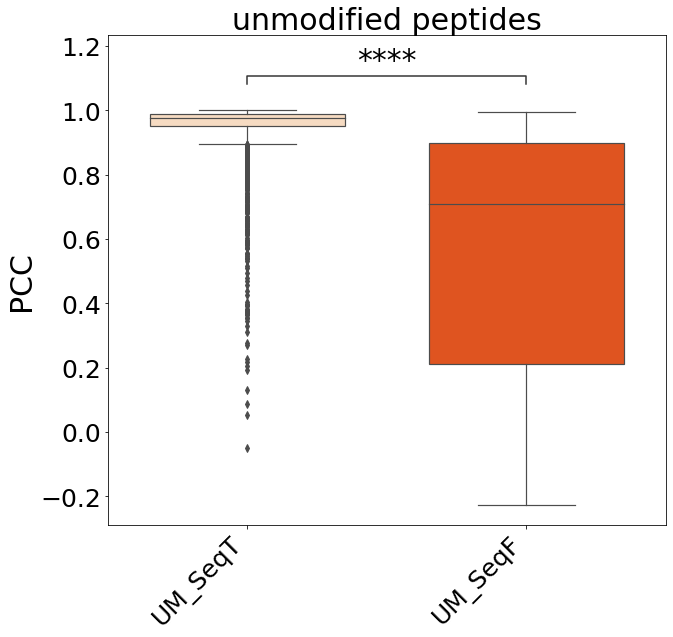

In [29]:
#Figure 3g
plt.figure(1, figsize=(10,9))
x = np.array(['UM_SeqT','UM_SeqF'])
Group = np.repeat(x, [len(H1['pcc']),len(H2['pcc'])], axis=0)
d = {'col1': np.array(pd.concat([H1['pcc'],H2['pcc']])), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"UM_SeqT": "peachpuff", 
          "UM_SeqF": "orangered"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('',weight='bold',size=12)
plt.title('unmodified peptides',size=30)
plt.ylabel('PCC',size=30)
plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("UM_SeqT","UM_SeqF")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/Figure3g_unmod_pcc_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [31]:
#AUROC
from sklearn.metrics import auc,roc_curve
from scipy import interp
from itertools import cycle

In [32]:
H1=H1.dropna()
H2=H2.dropna()
HH1=HH1.dropna()
LL2=LL2.dropna()
LL4=LL4.dropna()
sim1=sim1.dropna()
sim2=sim2.dropna()

In [33]:
n_classes=5
group=['UM_SeqF',
       'M_SeqT_LocF','M_sim1_LocF','M_sim2_LocF','M_SeqF']
# group=['Negative 1','Negative 2','Negative 3',
#        'Negative 4','Negative 5','Negaitve 6']
yscore=[H1['pcc'].tolist()+H2['pcc'].tolist(),
        HH1['pcc'].tolist()+LL2['pcc'].tolist(),
        HH1['pcc'].tolist()+sim1['pcc'].tolist(),
        HH1['pcc'].tolist()+sim2['pcc'].tolist(),
        HH1['pcc'].tolist()+LL4['pcc'].tolist()]
ytrue=[np.repeat([1,0],[len(H1['pcc']),len(H2['pcc'])]),
       np.repeat([1,0],[len(HH1['pcc']),len(LL2['pcc'])]),
       np.repeat([1,0],[len(HH1['pcc']),len(sim1['pcc'])]),
       np.repeat([1,0],[len(HH1['pcc']),len(sim2['pcc'])]),
       np.repeat([1,0],[len(HH1['pcc']),len(LL4['pcc'])])]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytrue[i], yscore[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-33-5c5e9fddd085>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<ipython-input-34-e2b3cdf24217>:22: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure3h_pcc-roc_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


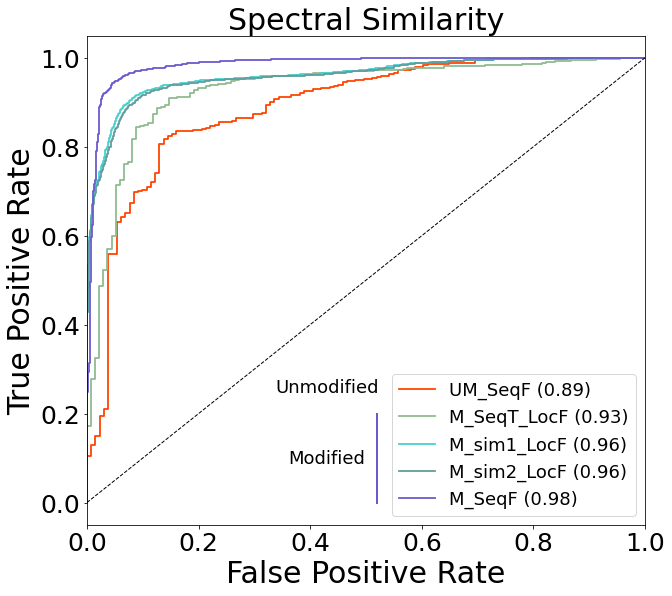

In [34]:
#Figure 3h
# Plot all ROC curves
plt.figure(1, figsize=(10,9))
colors = ['orangered', 'darkseagreen',
          'mediumturquoise','cadetblue','slateblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.8,
             label = group[i] +' ({1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=30)
plt.ylabel('True Positive Rate',size=30)
plt.title('Spectral Similarity',size=30)
plt.legend(loc="lower right",fontsize=18)
plt.yticks(size=25)
plt.xticks(size=25)
plt.text(0.43, 0.26, 'Unmodified', horizontalalignment='center',verticalalignment='center',size=18)
plt.plot([0.52, 0.52], [0.0, 0.2], 'k-', lw=2,color='slateblue')
plt.text(0.43, 0.1, 'Modified', horizontalalignment='center',verticalalignment='center',size=18)
plt.savefig('../plot/Figure3h_pcc-roc_6ions.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()